# Tuần 06: Thực hành: Decision Tree and Random Forest

Bài tập: phân loại dữ liệu mức độ hài lòng của khách hàng hàng không.

Nguồn dữ liệu: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Yêu cầu:
- Thực hiện được các bước tiền xử lý dữ liệu, xây dựng mô hình và đánh giá kết quả huấn luyện.
- Đối với bước xây dựng và đánh giá mô hình, hãy nghĩ cách giảm bớt việc viết code cho từng mô hình. Ý tưởng là chỉ mô hình đầu vào khác nhau, phần huấn luyện, dự đoán và đánh giá kết quả giống nhau.
- Gợi ý: viết thành function/class để sử dụng lại hoặc đơn giản là sử dụng vòng for lặp qua từng mô hình.
- Các mô hình cần xây dựng: Các mô hình phân loại đã học: LogisticRegression, KNN, RandomForest, DecisionTree.
- Lưu ý: Nếu bị tràn bộ nhớ, có thể giảm bớt dữ liệu train hoặc test.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df_train = pd.read_csv('Airline_Passenger_Satisfaction/train.csv')
df_test = pd.read_csv('Airline_Passenger_Satisfaction/test.csv')

In [89]:
df_test.shape

(25976, 25)

### Data pre-processing

In [90]:
import numpy as np
np.sum(df_train.isna())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [91]:
df_train = df_train.iloc[:,2:].dropna(axis=0)
df_test = df_test.iloc[:,2:].dropna(axis=0)

In [92]:
df_train.shape

(103594, 23)

In [93]:
np.sum(df_test.isna())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(df_train['satisfaction'])
df_train['satisfaction'] = LE.transform(df_train['satisfaction'])
df_test['satisfaction'] = LE.transform(df_test['satisfaction'])


In [95]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

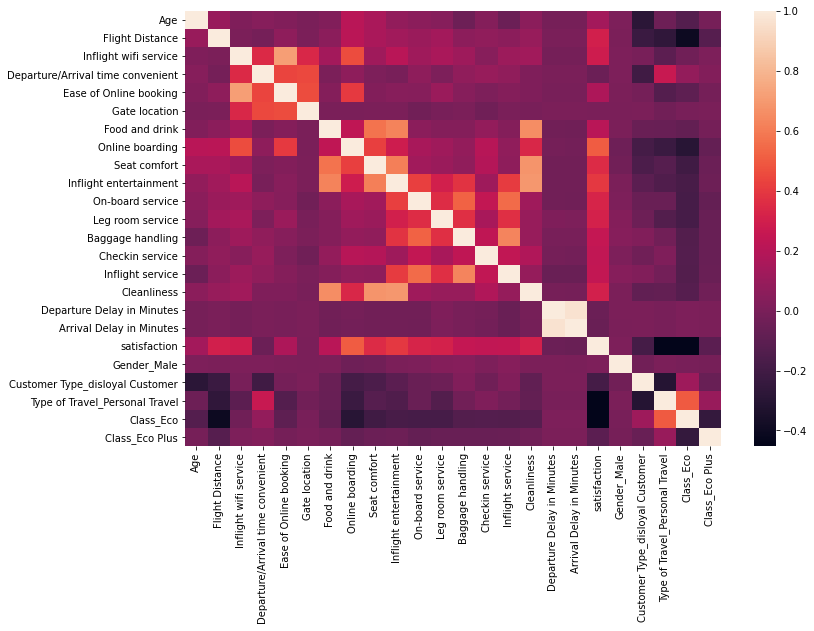

In [96]:
corr_mat = df_train.corr()
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.heatmap(corr_mat, ax=ax)

In [97]:
y_train = df_train['satisfaction'].to_numpy()
X_train = df_train.drop(['satisfaction'],axis=1).to_numpy()
y_test = df_test['satisfaction'].to_numpy()
X_test = df_test.drop(['satisfaction'],axis=1).to_numpy()

In [98]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([58697, 44897], dtype=int64))

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

In [14]:
## def for roc curve
def roc_curve_plot(ax, y_test, y_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    lw = 4
    ax.plot(
        fpr,
        tpr,
        lw=lw,
        color="darkorange",
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    ax.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC of Logistic Regression")
    plt.legend(loc="lower right")
#     plt.show()

In [15]:
### def for accuracy and result evaluation:
def model_evaluation(name_model, model, test_data, test_result):
    fig, axes = plt.subplots(1,2, figsize=(15,8),
                      subplot_kw={'xticks': (), 'yticks': ()})
    plt.suptitle(name_model, size=16, color='r')
    y_pred = model.predict(test_data)
    print(classification_report(test_result,y_pred))
    plot_confusion_matrix(model, test_data, test_result, ax=axes[0])
    y_prob = model.predict_proba(test_data)
    roc_curve_plot(axes[1], test_result, y_prob)

### 1. Logistic Regression 

In [16]:
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale =scaler.transform(X_test)

In [17]:
LogR1 = LogisticRegression()
LogR1.fit(X_train_scale, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



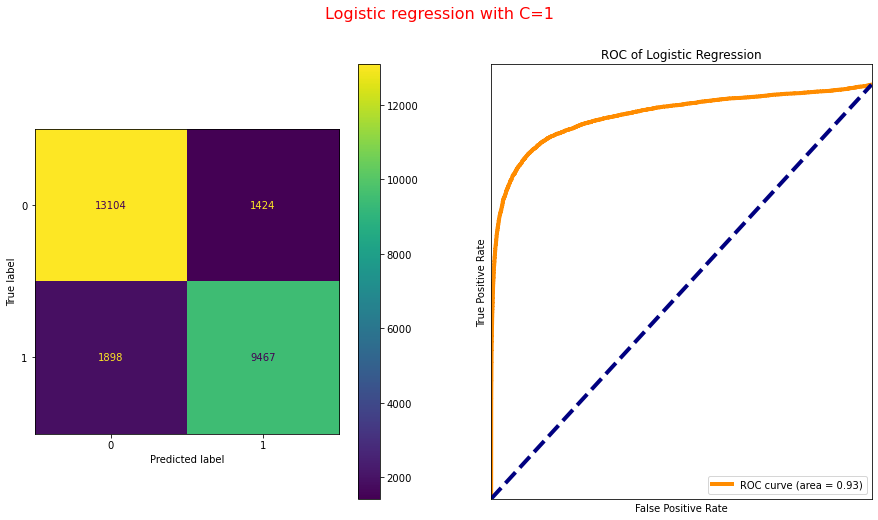

In [18]:
model_evaluation('Logistic regression with C=1',LogR1, X_test_scale, y_test)

## 2.Knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14528
           1       0.94      0.89      0.91     11365

    accuracy                           0.92     25893
   macro avg       0.93      0.92      0.92     25893
weighted avg       0.93      0.92      0.92     25893



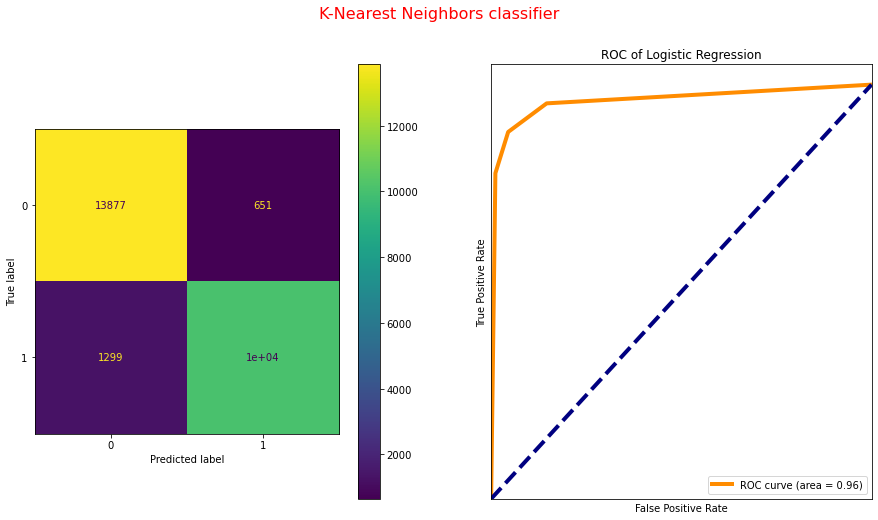

In [20]:
model_evaluation('K-Nearest Neighbors classifier',knn, X_test_scale, y_test)

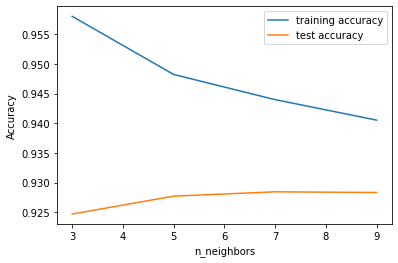

In [42]:
neighbors_settings = [3,5,7,9]
training_accuracy = []
test_accuracy = []
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scale, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_scale, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_scale, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 3. Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scale, y_train)

DecisionTreeClassifier()

In [120]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_scale, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_scale, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.945


-> It seems that the model is overfitting

In [121]:
tree = DecisionTreeClassifier(max_depth=14, criterion='gini')
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.969
Accuracy on test set: 0.954


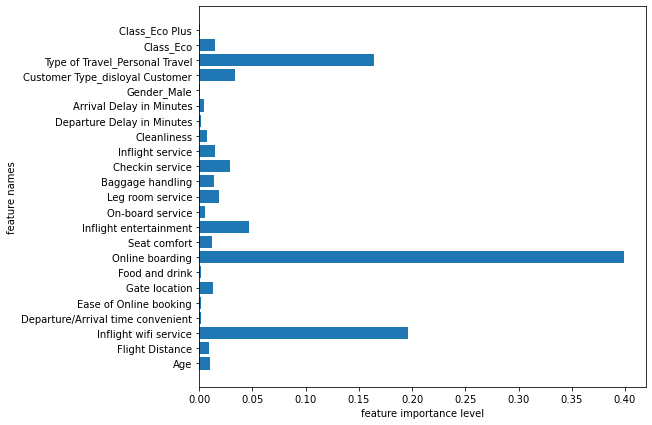

In [122]:
def plot_importance_feat(clf, data):
    feat_names = list(data.columns)
    feat_names.remove('satisfaction')
    feat_values = clf.feature_importances_
    plt.figure(figsize=(8,7))
    plt.barh(range(len(feat_values)), feat_values, align='center')
    plt.xlabel('feature importance level')
    plt.ylabel('feature names')
    plt.yticks(ticks=range(len(feat_values)), labels=feat_names);
plot_importance_feat(tree, df_train)

###### Thử drop 1 số features không ảnh hưởng nhiều 

In [123]:
cols_to_drop = ['Class_Eco Plus','Gender_Male','Departure Delay in Minutes',
               'Food and drink','Ease of Online booking','Departure/Arrival time convenient']
df_temp_train = df_train.drop(labels=cols_to_drop, axis='columns')
df_temp_test = df_test.drop(labels=cols_to_drop, axis='columns')

In [124]:
y_train_ = df_temp_train['satisfaction'].to_numpy()
X_train_ = df_temp_train.drop(['satisfaction'],axis=1).to_numpy()
y_test_ = df_temp_test ['satisfaction'].to_numpy()
X_test_ = df_temp_test .drop(['satisfaction'],axis=1).to_numpy()

In [125]:
tree = DecisionTreeClassifier(max_depth=14, criterion='gini')
tree.fit(X_train_, y_train_)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_, y_train_)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_, y_test_)))

Accuracy on training set: 0.968
Accuracy on test set: 0.953


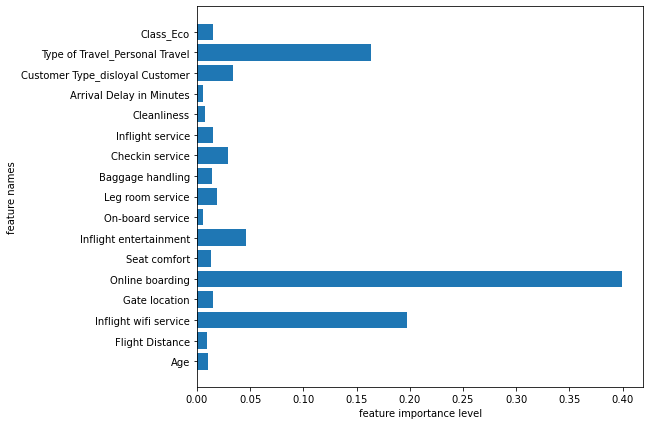

In [126]:
plot_importance_feat(tree, df_temp_train)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14528
           1       0.95      0.94      0.95     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



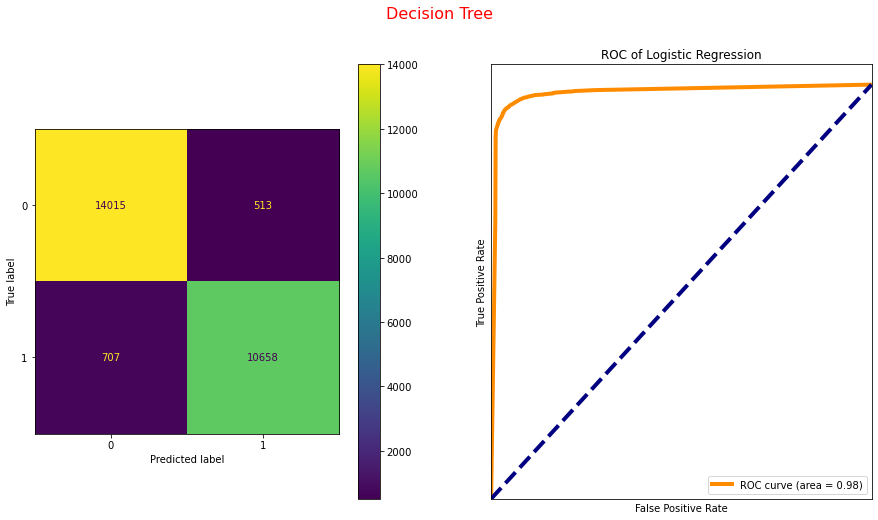

In [127]:
model_evaluation('Decision Tree', tree, X_test_, y_test_)

## 4. Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
forest = RandomForestClassifier(n_estimators=25, random_state=2, max_depth=15, max_features='log2')
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=25,
                       random_state=2)

In [147]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.976
Accuracy on test set: 0.957


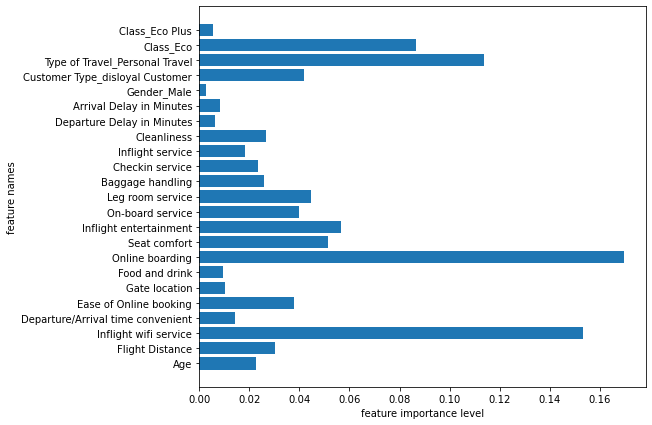

In [152]:
plot_importance_feat(forest, df_train)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14528
           1       0.96      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.95      0.96     25893
weighted avg       0.96      0.96      0.96     25893



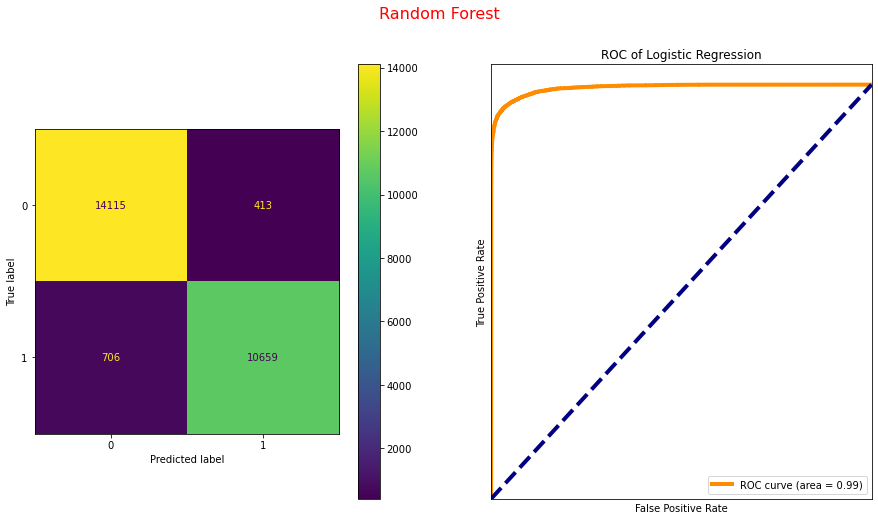

In [148]:
model_evaluation('Random Forest', forest, X_test, y_test)

## 5. Gradient Boosted Tree

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
grad = GradientBoostingClassifier(random_state=2, n_estimators=150)
grad.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=150, random_state=2)

In [172]:
print("Accuracy on training set: {:.3f}".format(grad.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grad.score(X_test, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.948


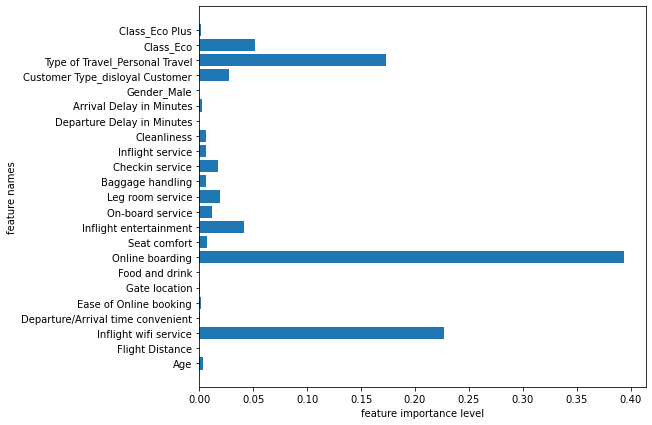

In [173]:
plot_importance_feat(grad, df_train)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14528
           1       0.95      0.93      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



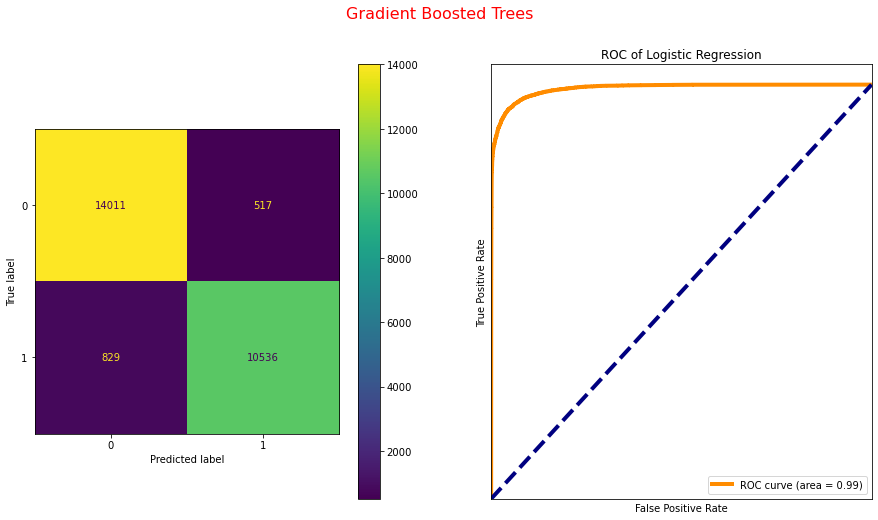

In [174]:
model_evaluation('Gradient Boosted Trees', grad, X_test, y_test)

# 3. Naive Bayes:
Using Bernoulli NB classifier 